In [1]:
pd.set_option("display.max_columns", 200)

In [2]:
df_high = pd.read_csv('high.csv')
df_mid = pd.read_csv('mid.csv')
df_low = pd.read_csv('low.csv')
df_raku = pd.read_csv('raku.csv')

In [3]:
df = pd.concat([df_high, df_low, df_mid, df_raku], axis=0, ignore_index=True)

# Color

In [4]:
df.isna().sum()

Glaze name         2
Cone              24
Color            444
Testing         1205
Surface          452
Firing           353
Transparency    1128
Recipe1            5
Recipe2            6
Recipe3           49
Recipe4          207
Recipe5          396
Recipe6          813
Recipe7         1252
Recipe8         1653
Recipe9         1897
Recipe10        2015
Recipe11        2073
Recipe12        2094
Recipe13        2100
Recipe14        2104
dtype: int64

In [5]:
df['Color'] = df['Color'].str.lower()
df['Color'].value_counts()

white                        264
clear                        174
black                         99
green                         72
blue                          54
red                           39
brown                         38
orange                        37
turquoise                     32
amber                         31
tan                           26
yellow                        22
purple                        21
opaque white                  19
transparent clear             15
iron red brown                13
pink                          12
bronze metallic               11
clear transparent             10
metallic bronze                9
light green                    9
chartreuse                     9
semi-opaque                    8
blue-green                     8
translucent white              8
iron red                       8
translucent green              7
off white                      7
copper red                     7
gray                           6
          

In [6]:
df['Color'].replace(['opaque white', 'translucent white', 'off white'], 'white', inplace=True)
df['Color'].replace(['transparent clear', 'clear transparent', 'semi-opaque'], 'clear', inplace=True)

In [7]:
tmp = []
threshold = df.shape[0]/100
for i in range(df['Color'].nunique()):
    if df['Color'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Color'].value_counts(sort=False).index[i])
len(tmp)

383

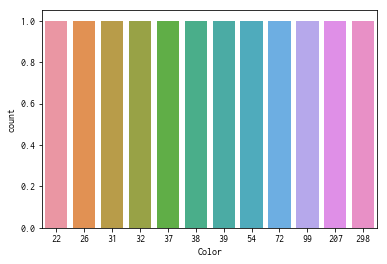

In [8]:
df['Color'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Color'].value_counts())

In [9]:
df['Color'].value_counts()

white        298
clear        207
black         99
green         72
blue          54
red           39
brown         38
orange        37
turquoise     32
amber         31
tan           26
yellow        22
Name: Color, dtype: int64

In [10]:
for ix in range(len(df)):
    if type(df['Color'][ix]) == float:
        df.drop(index=ix, inplace=True)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df

,Glaze name,Cone,Color,Testing,Surface,Firing,Transparency,Recipe1,Recipe2,Recipe3,Recipe4,Recipe5,Recipe6,Recipe7,Recipe8,Recipe9,Recipe10,Recipe11,Recipe12,Recipe13,Recipe14
0,Blue lithium,010-09,blue,NaN,Semi-gloss,Ox. or Red.,Opaque,Flint\t40.40,Soda spar\t20.20,Cryolite\t15.20,Lithium carbonate\t10.10,Bone ash\t8.10,Kaolin\t3.00,Copper oxide\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Matt Strontium Crystal Magic Steven Hill,10,white,NaN,Satin matt,Reduction,Opaque,Custer feldspar\t46.00,Whiting\t17.30,Tile 6 clay\t14.90,Strontium carbonate\t12.60,Frit 3124\t4.60,Lithium carbonate\t4.60,Titanium dioxide\t13.80,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Alkaline High Fire 1,9-10,clear,NaN,Gloss,Ox. or Red.,Transparent,Feldspar\t62.50,Whiting\t7.70,EPK\t5.10,Flint\t24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alkaline Lee Rexrode,9,white,NaN,Satin matt,Oxidation,Semi-opaque,Barium carbonate\t36.60,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alkaline Lee Rexrode Sr,9,white,NaN,Satin matt,Oxidation,Translucent,Strontium carbonate\t27.50,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Amber Barnard,10,amber,NaN,Gloss,Reduction,Transparent,Barnard clay\t33.00,Wollastonite\t13.00,Whiting\t15.00,Custer feldspar\t20.00,Gerstley borate\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amber Celadon McKenzie Smith,9-10,amber,NaN,Gloss,Reduction,Transparent,Wood ash\t22.00,Whiting\t17.00,Custer feldspar\t41.00,Ball clay\t4.00,Flint\t17.00,Red iron oxide\t8.00,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amber Celadon Nick's Ochre,10,amber,NaN,Gloss,Reduction,Transparent,Custer feldspar\t26.50,Whiting\t22.20,Flint\t25.60,Ball clay\t25.60,Yellow ochre\t8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Amber Celadon VC no albany,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t19.00,Gerstley borate\t3.00,Dolomite\t2.00,Wollastonite\t9.00,Whiting\t14.00,Redart\t29.00,Barnard clay\t10.00,EPK\t2.00,Flint\t10.00,Red iron oxide\t2.00,NaN,NaN,NaN,NaN
9,Amber Gulden's,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t30.00,Whiting\t25.00,Flint\t25.00,Kentucky OM #4\t10.00,Gerstley borate\t3.00,Bentonite\t2.00,Yellow iron oxide\t7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Glaze name

In [13]:
df['Glaze name'] = df['Glaze name'].str.lower()
df['Glaze name'].value_counts()

turquoise                                   3
black matte                                 3
slip black                                  3
white crackle phil's                        3
clear                                       2
slip robin hopper's                         2
green forrest                               2
white waxy                                  2
clear glaze                                 2
celadon faux                                2
satin rick haynes                           2
crackle keator                              2
amber new tyler                             2
slip ron meyers                             2
black metallic                              2
celadon 974 kawai                           2
clear les lawrence                          2
black mirror                                2
reeds glory black                           2
ash frasca                                  2
clear ron meyers                            2
white matt                        

In [14]:
df.drop('Glaze name', axis=1, inplace=True)

# Cone

In [15]:
df['Cone'] = df['Cone'].str.lower()
df['Cone'].replace(['10 - 12', '10-12', '011'], '11', inplace=True)
df['Cone'].replace(['10 - 11', '10-11'], '10.5', inplace=True)
df['Cone'].replace(['9 - 11', '9-11', '9 - 10 - 11', '10?'], '10', inplace=True)
df['Cone'].replace(['9 - 10', '9-10', '010-09', '9-=10'], '9.5', inplace=True)
df['Cone'].replace(['8 - 10', '8-10', '8 - 9 - 10', '8 - 9 - 10', '9 only', '010 - 08'], '9', inplace=True)
df['Cone'].replace('8 - 9', '8.5', inplace=True)
df['Cone'].replace(['7 - 9', '08'], '8', inplace=True)
df['Cone'].replace(['7 - 8', '7-8'], '7.5', inplace=True)
df['Cone'].replace(['08 - 06', '6 - 8', '08-06', '6-8'], '7', inplace=True)
df['Cone'].replace(['6 - 7', '06 - 07', '07 - 06'], '6.5', inplace=True)
df['Cone'].replace(['06', '5-7', '5 - 7'], '6', inplace=True)
df['Cone'].replace(['5 - 6', '5-6', 'cone 5-6'], '5.5', inplace=True)
df['Cone'].replace(['05', '06-04', '4 - 6', '06 - 04'], '5', inplace=True)
df['Cone'].replace(['4 - 5', '05 - 04'], '4.5', inplace=True)
df['Cone'].replace(['04', '05-03', '3 - 5'], '4', inplace=True)
df['Cone'].replace(['04-03', '04 - 03', '03 - 04'], '3.5', inplace=True)
df['Cone'].replace(['03', '2-4', '04-02', '03?'], '3', inplace=True)
df['Cone'].replace(['03-02'], '2.5', inplace=True)
df['Cone'].replace(['02', '1-3'], '2', inplace=True)
df['Cone'].replace(['02-01'], '1.5', inplace=True)
df['Cone'].replace(['01'], '1', inplace=True)

df['Cone'].replace(['3 - 6', '014', '08-04', '06-03', '5 - 8', '6 - 11', '04-11', '2 - 6', '04-9', '04-01', '5 - 9', '4 - 5 - 6 - 7 - 8', '06-01', '4 - 7', '08 - 04', '06 - 03', '2 - 5', '6 - 10', '6-10', '7 - 10', '9 - 12', '6 - 9', '5-9', '04 - 12', '5 - 10', '5-10', '6, 7, 8, 9, 10'], np.NaN, inplace=True)
df['Cone'].value_counts()

6       177
10      154
4       135
9.5      83
3.5      76
5.5      68
5        62
9        55
3        28
7        17
6.5      10
8         9
10.5      9
2         8
1         6
11        3
4.5       2
2.5       1
1.5       1
Name: Cone, dtype: int64

In [16]:
df = pd.concat([df, pd.get_dummies(df['Cone'], prefix='Cone_', dummy_na=True)], axis=1)
df = df.drop('Cone', axis=1)

# Testing

In [17]:
df['Testing'] = df['Testing'].str.lower()
df['Testing'].value_counts()

untested    294
tested       69
Name: Testing, dtype: int64

In [18]:
df.drop('Testing', axis=1, inplace=True)

# Surface

In [19]:
df.isna().sum()

Color             0
Surface         143
Firing           95
Transparency    310
Recipe1           0
Recipe2           0
Recipe3          12
Recipe4          88
Recipe5         176
Recipe6         367
Recipe7         555
Recipe8         755
Recipe9         860
Recipe10        916
Recipe11        937
Recipe12        951
Recipe13        953
Recipe14        955
Cone__1           0
Cone__1.5         0
Cone__10          0
Cone__10.5        0
Cone__11          0
Cone__2           0
Cone__2.5         0
Cone__3           0
Cone__3.5         0
Cone__4           0
Cone__4.5         0
Cone__5           0
Cone__5.5         0
Cone__6           0
Cone__6.5         0
Cone__7           0
Cone__8           0
Cone__9           0
Cone__9.5         0
Cone__nan         0
dtype: int64

In [20]:
df['Surface'] = df['Surface'].str.lower()
df['Surface'].value_counts()

gloss                                254
satin matt                           112
unglazed                              72
matt                                  60
glossy                                45
waxy                                  35
semi-gloss                            30
matte                                 28
satin matte                           14
glossy or shiny                       12
?                                     11
shiny or glossy                       11
shiny glossy                          10
glossy shiny                          10
satin                                  9
lichen                                 7
shiny, glossy                          6
semi-matte or satin                    6
glossy, shiny                          5
crawl                                  5
shiny                                  5
slip or engobe                         5
semi matt                              4
texture                                4
satin to gloss  

In [21]:
df['Surface'].replace('?', np.NAN, inplace=True)
df['Surface'].replace('gloss', 'glossy', inplace=True)
df['Surface'].replace('matt', 'matte', inplace=True)
df['Surface'].replace(['satin matt', 'satin  matt'], 'satin matte', inplace=True)
df['Surface'].replace(['shiny or glossy', 'shiny glossy', 'glossy, shiny', 'shiny, glossy'], 'glossy shiny', inplace=True)
df['Surface'].value_counts()

glossy                               299
satin matte                          128
matte                                 88
unglazed                              72
glossy shiny                          42
waxy                                  35
semi-gloss                            30
glossy or shiny                       12
satin                                  9
lichen                                 7
semi-matte or satin                    6
shiny                                  5
crawl                                  5
slip or engobe                         5
semi matt                              4
texture                                4
crater                                 3
metallic                               3
satin to gloss                         3
bright glossy                          3
satin-matt                             2
semi-matte                             2
dry matte                              2
luster                                 2
slip            

In [22]:
tmp = []
threshold = df.shape[0]/50
for i in range(df['Surface'].nunique()):
    if df['Surface'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Surface'].value_counts(sort=False).index[i])
len(tmp)

44

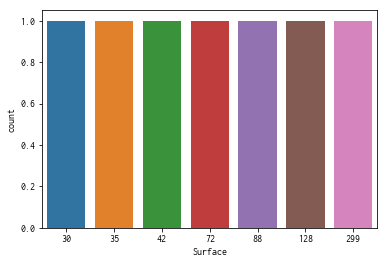

In [23]:
df['Surface'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Surface'].value_counts())

In [24]:
df['Surface'].value_counts()

glossy          299
satin matte     128
matte            88
unglazed         72
glossy shiny     42
waxy             35
semi-gloss       30
Name: Surface, dtype: int64

In [25]:
for ix in range(len(df)):
    if type(df['Surface'][ix]) == float:
        df.drop(index=ix, inplace=True)

In [26]:
df.reset_index(drop=True, inplace=True)

# Firing

In [27]:
df['Firing'] = df['Firing'].str.lower()
df['Firing'].value_counts()

oxidation               353
ox. or red.             122
reduction               121
ox or red                15
raku                     13
salt - soda               6
soda                      4
wood                      3
oxidation, reduction      2
ox. or red. or soda       2
oxidaition                1
Name: Firing, dtype: int64

In [28]:
df['Firing'].replace(['ox or red', 'oxidation, reduction'], 'ox. or red.', inplace=True)
df['Firing'].replace(['salt', 'soda'], 'salt - soda', inplace=True)
df['Firing'].replace(['oxidaition', 'ox'], 'oxidation', inplace=True)
df['Firing'].replace('reduction o', 'repruction', inplace=True)
df['Firing'].value_counts()

oxidation              354
ox. or red.            139
reduction              121
raku                    13
salt - soda             10
wood                     3
ox. or red. or soda      2
Name: Firing, dtype: int64

In [29]:
df['Firing'] = df['Firing'].str.lower()
tmp = []
threshold = df.shape[0]/100
for i in range(df['Firing'].nunique()):
    if df['Firing'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Firing'].value_counts(sort=False).index[i])
len(tmp)

2

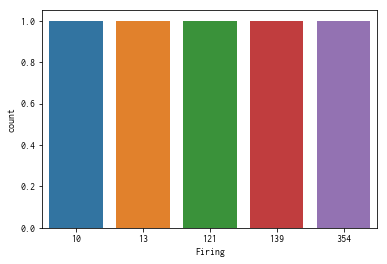

In [30]:
df['Firing'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Firing'].value_counts())

In [31]:
df['Firing'].value_counts()

oxidation      354
ox. or red.    139
reduction      121
raku            13
salt - soda     10
Name: Firing, dtype: int64

In [32]:
df = pd.concat([df, pd.get_dummies(df['Firing'], prefix='Firing_', dummy_na=True)], axis=1)
df = df.drop('Firing', axis=1)

# Transparency

In [33]:
df.isna().sum()

Color                    0
Surface                  0
Transparency           152
Recipe1                  0
Recipe2                  0
Recipe3                  6
Recipe4                 50
Recipe5                108
Recipe6                253
Recipe7                400
Recipe8                547
Recipe9                625
Recipe10               663
Recipe11               679
Recipe12               691
Recipe13               693
Recipe14               694
Cone__1                  0
Cone__1.5                0
Cone__10                 0
Cone__10.5               0
Cone__11                 0
Cone__2                  0
Cone__2.5                0
Cone__3                  0
Cone__3.5                0
Cone__4                  0
Cone__4.5                0
Cone__5                  0
Cone__5.5                0
Cone__6                  0
Cone__6.5                0
Cone__7                  0
Cone__8                  0
Cone__9                  0
Cone__9.5                0
Cone__nan                0
F

In [34]:
df['Transparency'] = df['Transparency'].str.lower()
df['Transparency'].value_counts()

opaque         265
transparent    159
translucent     69
semi-opaque     49
Name: Transparency, dtype: int64

In [35]:
df['Transparency'].replace('translucent', 'semi-opaque', inplace=True)

In [36]:
df['Transparency'].value_counts()

opaque         265
transparent    159
semi-opaque    118
Name: Transparency, dtype: int64

In [37]:
for ix in range(len(df)):
    if type(df['Transparency'][ix]) == float:
        df.drop(index=ix, inplace=True)

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df.isna().sum()

Color                    0
Surface                  0
Transparency             0
Recipe1                  0
Recipe2                  0
Recipe3                  5
Recipe4                 40
Recipe5                 86
Recipe6                201
Recipe7                312
Recipe8                426
Recipe9                485
Recipe10               515
Recipe11               530
Recipe12               539
Recipe13               541
Recipe14               542
Cone__1                  0
Cone__1.5                0
Cone__10                 0
Cone__10.5               0
Cone__11                 0
Cone__2                  0
Cone__2.5                0
Cone__3                  0
Cone__3.5                0
Cone__4                  0
Cone__4.5                0
Cone__5                  0
Cone__5.5                0
Cone__6                  0
Cone__6.5                0
Cone__7                  0
Cone__8                  0
Cone__9                  0
Cone__9.5                0
Cone__nan                0
F

In [40]:
df

,Color,Surface,Transparency,Recipe1,Recipe2,Recipe3,Recipe4,Recipe5,Recipe6,Recipe7,Recipe8,Recipe9,Recipe10,Recipe11,Recipe12,Recipe13,Recipe14,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan
0,blue,semi-gloss,opaque,Flint\t40.40,Soda spar\t20.20,Cryolite\t15.20,Lithium carbonate\t10.10,Bone ash\t8.10,Kaolin\t3.00,Copper oxide\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,white,satin matte,opaque,Custer feldspar\t46.00,Whiting\t17.30,Tile 6 clay\t14.90,Strontium carbonate\t12.60,Frit 3124\t4.60,Lithium carbonate\t4.60,Titanium dioxide\t13.80,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,clear,glossy,transparent,Feldspar\t62.50,Whiting\t7.70,EPK\t5.10,Flint\t24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,white,satin matte,semi-opaque,Barium carbonate\t36.60,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,white,satin matte,semi-opaque,Strontium carbonate\t27.50,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,amber,glossy,transparent,Barnard clay\t33.00,Wollastonite\t13.00,Whiting\t15.00,Custer feldspar\t20.00,Gerstley borate\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,amber,glossy,transparent,Wood ash\t22.00,Whiting\t17.00,Custer feldspar\t41.00,Ball clay\t4.00,Flint\t17.00,Red iron oxide\t8.00,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7,amber,glossy,transparent,Custer feldspar\t26.50,Whiting\t22.20,Flint\t25.60,Ball clay\t25.60,Yellow ochre\t8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,amber,glossy,semi-opaque,Custer feldspar\t19.00,Gerstley borate\t3.00,Dolomite\t2.00,Wollastonite\t9.00,Whiting\t14.00,Redart\t29.00,Barnard clay\t10.00,EPK\t2.00,Flint\t10.00,Red iron oxide\t2.00,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,amber,glossy,semi-opaque,Custer feldspar\t30.00,Whiting\t25.00,Flint\t25.00,Kentucky OM #4\t10.00,Gerstley borate\t3.00,Bentonite\t2.00,Yellow iron oxide\t7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Recipe

In [41]:
recipe = []

In [42]:
ingredients = []
for col in df.columns:
    if col.startswith('Recipe'):
        for ix in range(df.shape[0]):
            ingredients.append(str(df[col][ix]).split('\t')[0:2])
df_ingredients = pd.DataFrame(ingredients)
df_ingredients.columns = ['ingredient', 'amount']

In [43]:
df_ingredients['amount'] = df_ingredients['amount'].astype('float64')

In [44]:
df_ingredients

,ingredient,amount
0,Flint,40.4
1,Custer feldspar,46.0
2,Feldspar,62.5
3,Barium carbonate,36.6
4,Strontium carbonate,27.5
5,Barnard clay,33.0
6,Wood ash,22.0
7,Custer feldspar,26.5
8,Custer feldspar,19.0
9,Custer feldspar,30.0


In [45]:
df_ingredients['ingredient'] = df_ingredients['ingredient'].str.lower()
len(df_ingredients['ingredient'].unique())

198

In [46]:
for ingredient in df_ingredients['ingredient'].unique():
    df[ingredient] = 0.

In [47]:
for iing in range(int(len(df_ingredients)/len(df))):
    for ix in range(len(df)):
        ingredient = df_ingredients['ingredient'][len(df)*iing + ix]
        amount = df_ingredients['amount'][len(df)*iing + ix]
        df[ingredient][ix] = amount

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [48]:
for col in df.columns:
    if col.startswith('Recipe'):
        df.drop(str(col), axis=1, inplace=True)

In [49]:
df

,Color,Surface,Transparency,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,cornwall stone,dolomite,g-200 spar,kona f-4 feldspar,kona f-4 spar,whiting,k-200 feldspar,g-200 feldspar,kaolin,tile 6 clay,goldart,grolleg,foundry hill creme,xx sagger,hawthorne bond,potash feldspar,silica,zinc oxide,potash feldspar - theoretical,frit 3110,red clay,bone ash,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,redart,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit p-25,frit 3124,frit 3819,frit 3269,borax,frit 3195,spodumene,lithium carbonate,ferro frit 3110,talc,ranger red clay,talc theoretical,ball clay,nepheline sye,frit 3289,frit 3185,frit 5301,ferro frit 3124,soda feldspar - theoretical,frit 3292,kaolin - theoretical,laguna borate,...,velva cast,tennessee ball clay,fire clay,china clay,salt,calcined kaolin,newman red,mason 6600 black stain,boric acid,fireclay,frit p-54,tin oxide,oxford feldspar,copper carbonate,bentonite,grog (150 mesh),calcium carbonate,magnesium carb,cryolite,"cobalt oxide, black",cobalt oxide,lincoln,nan,zircopax,red iron oxide,macaloid,lepidolite,zirconium oxide,manganese dioxide,alumina hydrate,neph sy,potspar,spodumene - theoretical,pyrax,pioneer kaolin,rutile,petalite,georgia kaolin,superpax,pine lake,alumina,flint (silica),kona f-4 soda feldspar,nsd,zircopax plus,titanium dioxide,talc (milled white),lead carbonate,zirconium silicate,grog,neuman red,ferro frit 3134,ash wood,spodumene - australian,cobalt carbonate,ultrox,kentucky ball clay,silica (325m),yellow ochre,kaopaque,chrome oxide,clay,rhyolite,fluorspar,cmc,mason stain 6600,black iron oxide,ochre,redart clay,manganese carbonate,cobalt stain,copper oxide red,sodium silicate,burnt umber,chromium oxide,black stain,iron oxide,epsom salts,potterycrafts frit p2960,nickel carbonate,opax,copper oxide,yellow iron oxide,green chrome oxide,nickel oxide,molochite,mullite,talc (ny),glomax,v-gum t,kyanite,tennessee #10,granular ilmenite,darvan 7,cerdec intensive red stain,volcanic ash - mt. st. helens,tin,burnt sienna,ferric oxide,silica sand
0,blue,semi-gloss,opaque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,10.10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.2,0.0,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,white,satin matte,opaque,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00,46.0,0.0,0.0,12.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.0,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,4.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [50]:
df.drop('nan', axis=1, inplace=True)

In [51]:
df

,Color,Surface,Transparency,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,cornwall stone,dolomite,g-200 spar,kona f-4 feldspar,kona f-4 spar,whiting,k-200 feldspar,g-200 feldspar,kaolin,tile 6 clay,goldart,grolleg,foundry hill creme,xx sagger,hawthorne bond,potash feldspar,silica,zinc oxide,potash feldspar - theoretical,frit 3110,red clay,bone ash,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,redart,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit p-25,frit 3124,frit 3819,frit 3269,borax,frit 3195,spodumene,lithium carbonate,ferro frit 3110,talc,ranger red clay,talc theoretical,ball clay,nepheline sye,frit 3289,frit 3185,frit 5301,ferro frit 3124,soda feldspar - theoretical,frit 3292,kaolin - theoretical,laguna borate,...,a.p. green,velva cast,tennessee ball clay,fire clay,china clay,salt,calcined kaolin,newman red,mason 6600 black stain,boric acid,fireclay,frit p-54,tin oxide,oxford feldspar,copper carbonate,bentonite,grog (150 mesh),calcium carbonate,magnesium carb,cryolite,"cobalt oxide, black",cobalt oxide,lincoln,zircopax,red iron oxide,macaloid,lepidolite,zirconium oxide,manganese dioxide,alumina hydrate,neph sy,potspar,spodumene - theoretical,pyrax,pioneer kaolin,rutile,petalite,georgia kaolin,superpax,pine lake,alumina,flint (silica),kona f-4 soda feldspar,nsd,zircopax plus,titanium dioxide,talc (milled white),lead carbonate,zirconium silicate,grog,neuman red,ferro frit 3134,ash wood,spodumene - australian,cobalt carbonate,ultrox,kentucky ball clay,silica (325m),yellow ochre,kaopaque,chrome oxide,clay,rhyolite,fluorspar,cmc,mason stain 6600,black iron oxide,ochre,redart clay,manganese carbonate,cobalt stain,copper oxide red,sodium silicate,burnt umber,chromium oxide,black stain,iron oxide,epsom salts,potterycrafts frit p2960,nickel carbonate,opax,copper oxide,yellow iron oxide,green chrome oxide,nickel oxide,molochite,mullite,talc (ny),glomax,v-gum t,kyanite,tennessee #10,granular ilmenite,darvan 7,cerdec intensive red stain,volcanic ash - mt. st. helens,tin,burnt sienna,ferric oxide,silica sand
0,blue,semi-gloss,opaque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,10.10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,white,satin matte,opaque,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00,46.0,0.0,0.0,12.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.0,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,4.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

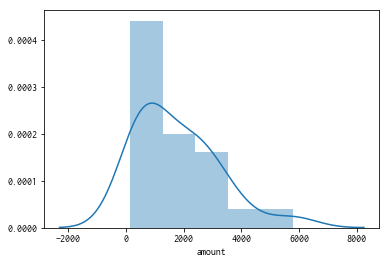

In [52]:
tmp = df_ingredients['amount'][pd.notna(df_ingredients['amount'])]
sns.distplot(tmp[tmp>100])

In [53]:
tmp[tmp>100]

161      778.4
294     2640.0
295     2000.0
422     4000.0
703      603.0
836     1840.0
837     2000.0
964     3000.0
1245     570.5
1378     480.0
1379    2400.0
1506    1000.0
1787     940.8
1920     480.0
1921     800.0
2048    5800.0
2462     320.0
2463     800.0
2590    3000.0
3004    2160.0
3132    3200.0
3674     140.0
Name: amount, dtype: float64

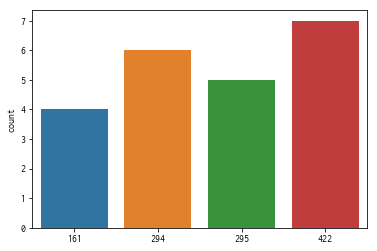

In [54]:
sns.countplot(tmp[tmp>100].index%df.shape[0])

In [55]:
del_ix = tmp[tmp>100].index%df.shape[0]

In [56]:
del_ix

Int64Index([161, 294, 295, 422, 161, 294, 295, 422, 161, 294, 295, 422, 161,
            294, 295, 422, 294, 295, 422, 294, 422, 422],
           dtype='int64')

In [57]:
df.drop(index=del_ix, inplace=True)
df.reset_index(drop=True, inplace=True)

In [58]:
df

,Color,Surface,Transparency,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,cornwall stone,dolomite,g-200 spar,kona f-4 feldspar,kona f-4 spar,whiting,k-200 feldspar,g-200 feldspar,kaolin,tile 6 clay,goldart,grolleg,foundry hill creme,xx sagger,hawthorne bond,potash feldspar,silica,zinc oxide,potash feldspar - theoretical,frit 3110,red clay,bone ash,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,redart,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit p-25,frit 3124,frit 3819,frit 3269,borax,frit 3195,spodumene,lithium carbonate,ferro frit 3110,talc,ranger red clay,talc theoretical,ball clay,nepheline sye,frit 3289,frit 3185,frit 5301,ferro frit 3124,soda feldspar - theoretical,frit 3292,kaolin - theoretical,laguna borate,...,a.p. green,velva cast,tennessee ball clay,fire clay,china clay,salt,calcined kaolin,newman red,mason 6600 black stain,boric acid,fireclay,frit p-54,tin oxide,oxford feldspar,copper carbonate,bentonite,grog (150 mesh),calcium carbonate,magnesium carb,cryolite,"cobalt oxide, black",cobalt oxide,lincoln,zircopax,red iron oxide,macaloid,lepidolite,zirconium oxide,manganese dioxide,alumina hydrate,neph sy,potspar,spodumene - theoretical,pyrax,pioneer kaolin,rutile,petalite,georgia kaolin,superpax,pine lake,alumina,flint (silica),kona f-4 soda feldspar,nsd,zircopax plus,titanium dioxide,talc (milled white),lead carbonate,zirconium silicate,grog,neuman red,ferro frit 3134,ash wood,spodumene - australian,cobalt carbonate,ultrox,kentucky ball clay,silica (325m),yellow ochre,kaopaque,chrome oxide,clay,rhyolite,fluorspar,cmc,mason stain 6600,black iron oxide,ochre,redart clay,manganese carbonate,cobalt stain,copper oxide red,sodium silicate,burnt umber,chromium oxide,black stain,iron oxide,epsom salts,potterycrafts frit p2960,nickel carbonate,opax,copper oxide,yellow iron oxide,green chrome oxide,nickel oxide,molochite,mullite,talc (ny),glomax,v-gum t,kyanite,tennessee #10,granular ilmenite,darvan 7,cerdec intensive red stain,volcanic ash - mt. st. helens,tin,burnt sienna,ferric oxide,silica sand
0,blue,semi-gloss,opaque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,10.10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,white,satin matte,opaque,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00,46.0,0.0,0.0,12.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.0,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,4.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [59]:
df_ingredients['ingredient'].str.lower().value_counts()

nan                              4222
epk                               242
whiting                           242
flint                             236
nepheline syenite                 149
silica                            147
bentonite                         145
gerstley borate                   144
custer feldspar                   128
dolomite                          111
ball clay                          79
kaolin                             71
red iron oxide                     71
lithium carbonate                  67
zircopax                           66
zinc oxide                         65
frit 3124                          64
barium carbonate                   64
talc                               60
copper carbonate                   60
frit 3134                          53
strontium carbonate                50
wollastonite                       48
kentucky om #4                     44
tin oxide                          44
kona f-4 feldspar                  41
kaolin - the

In [60]:
tmp = []
threshold = df.shape[0]/100
for i in range(df_ingredients['ingredient'].nunique()):
    if df_ingredients['ingredient'].value_counts(sort=False)[i] < threshold:
        tmp.append(df_ingredients['ingredient'].value_counts(sort=False).index[i])
len(tmp)

124

In [61]:
tmp.sort()

In [62]:
tmp

['3191',
 'a.p. green',
 'albany slip clay',
 'alberta slip',
 'alumina',
 'ash wood',
 'barnard slip',
 'black stain',
 'boric acid',
 'burnt sienna',
 'burnt umber',
 'calcium carbonate',
 'cerdec intensive red stain',
 'clay',
 'cobalt oxide, black',
 'cobalt stain',
 'copper oxide',
 'copper oxide red',
 'darvan 7',
 'f-4 feldspar',
 'feldspar - theoretical',
 'ferric oxide',
 'ferro frit 3110',
 'ferro frit 3134',
 'ferro frit 3292',
 'fire clay',
 'fireclay',
 'flint (silica)',
 'fluorspar',
 'foundry hill creme',
 'frit 2106 hommel',
 'frit 3185',
 'frit 3269',
 'frit 3278',
 'frit 3289',
 'frit 3292',
 'frit p-25',
 'frit p-54',
 'frit p-626',
 'fusion frit f-245',
 'fusion frit f38',
 'g-200 spar',
 'g22',
 'georgia kaolin',
 'gerstley  borate',
 'gillespie borate',
 'glomax',
 'granular ilmenite',
 'green chrome oxide',
 'grog (150 mesh)',
 'grog,150 mesh',
 'hardwood ash',
 'hawthorne bond',
 'iron oxide',
 'k-200 feldspar',
 'kaopaque',
 'kentucky ball clay',
 'kona f-4',
 

# modeling

In [63]:
df

,Color,Surface,Transparency,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,cornwall stone,dolomite,g-200 spar,kona f-4 feldspar,kona f-4 spar,whiting,k-200 feldspar,g-200 feldspar,kaolin,tile 6 clay,goldart,grolleg,foundry hill creme,xx sagger,hawthorne bond,potash feldspar,silica,zinc oxide,potash feldspar - theoretical,frit 3110,red clay,bone ash,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,redart,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit p-25,frit 3124,frit 3819,frit 3269,borax,frit 3195,spodumene,lithium carbonate,ferro frit 3110,talc,ranger red clay,talc theoretical,ball clay,nepheline sye,frit 3289,frit 3185,frit 5301,ferro frit 3124,soda feldspar - theoretical,frit 3292,kaolin - theoretical,laguna borate,...,a.p. green,velva cast,tennessee ball clay,fire clay,china clay,salt,calcined kaolin,newman red,mason 6600 black stain,boric acid,fireclay,frit p-54,tin oxide,oxford feldspar,copper carbonate,bentonite,grog (150 mesh),calcium carbonate,magnesium carb,cryolite,"cobalt oxide, black",cobalt oxide,lincoln,zircopax,red iron oxide,macaloid,lepidolite,zirconium oxide,manganese dioxide,alumina hydrate,neph sy,potspar,spodumene - theoretical,pyrax,pioneer kaolin,rutile,petalite,georgia kaolin,superpax,pine lake,alumina,flint (silica),kona f-4 soda feldspar,nsd,zircopax plus,titanium dioxide,talc (milled white),lead carbonate,zirconium silicate,grog,neuman red,ferro frit 3134,ash wood,spodumene - australian,cobalt carbonate,ultrox,kentucky ball clay,silica (325m),yellow ochre,kaopaque,chrome oxide,clay,rhyolite,fluorspar,cmc,mason stain 6600,black iron oxide,ochre,redart clay,manganese carbonate,cobalt stain,copper oxide red,sodium silicate,burnt umber,chromium oxide,black stain,iron oxide,epsom salts,potterycrafts frit p2960,nickel carbonate,opax,copper oxide,yellow iron oxide,green chrome oxide,nickel oxide,molochite,mullite,talc (ny),glomax,v-gum t,kyanite,tennessee #10,granular ilmenite,darvan 7,cerdec intensive red stain,volcanic ash - mt. st. helens,tin,burnt sienna,ferric oxide,silica sand
0,blue,semi-gloss,opaque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,10.10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,white,satin matte,opaque,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00,46.0,0.0,0.0,12.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.0,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,4.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [64]:
X = df.drop(['Color', 'Surface', 'Transparency'], axis=1)
y = pd.concat([df['Color'], df['Surface'], df['Transparency']], axis=1)

In [65]:
X

,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,cornwall stone,dolomite,g-200 spar,kona f-4 feldspar,kona f-4 spar,whiting,k-200 feldspar,g-200 feldspar,kaolin,tile 6 clay,goldart,grolleg,foundry hill creme,xx sagger,hawthorne bond,potash feldspar,silica,zinc oxide,potash feldspar - theoretical,frit 3110,red clay,bone ash,gillespie borate,soda ash,"grog,150 mesh",gerstley borate,redart,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit p-25,frit 3124,frit 3819,frit 3269,borax,frit 3195,spodumene,lithium carbonate,ferro frit 3110,talc,ranger red clay,talc theoretical,ball clay,nepheline sye,frit 3289,frit 3185,frit 5301,ferro frit 3124,soda feldspar - theoretical,frit 3292,kaolin - theoretical,laguna borate,frit 2106 hommel,wollastonite,fusion frit f38,...,a.p. green,velva cast,tennessee ball clay,fire clay,china clay,salt,calcined kaolin,newman red,mason 6600 black stain,boric acid,fireclay,frit p-54,tin oxide,oxford feldspar,copper carbonate,bentonite,grog (150 mesh),calcium carbonate,magnesium carb,cryolite,"cobalt oxide, black",cobalt oxide,lincoln,zircopax,red iron oxide,macaloid,lepidolite,zirconium oxide,manganese dioxide,alumina hydrate,neph sy,potspar,spodumene - theoretical,pyrax,pioneer kaolin,rutile,petalite,georgia kaolin,superpax,pine lake,alumina,flint (silica),kona f-4 soda feldspar,nsd,zircopax plus,titanium dioxide,talc (milled white),lead carbonate,zirconium silicate,grog,neuman red,ferro frit 3134,ash wood,spodumene - australian,cobalt carbonate,ultrox,kentucky ball clay,silica (325m),yellow ochre,kaopaque,chrome oxide,clay,rhyolite,fluorspar,cmc,mason stain 6600,black iron oxide,ochre,redart clay,manganese carbonate,cobalt stain,copper oxide red,sodium silicate,burnt umber,chromium oxide,black stain,iron oxide,epsom salts,potterycrafts frit p2960,nickel carbonate,opax,copper oxide,yellow iron oxide,green chrome oxide,nickel oxide,molochite,mullite,talc (ny),glomax,v-gum t,kyanite,tennessee #10,granular ilmenite,darvan 7,cerdec intensive red stain,volcanic ash - mt. st. helens,tin,burnt sienna,ferric oxide,silica sand
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,10.10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00,46.0,0.0,0.0,12.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,17.30,0.0,0.0,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.00,0.0,0.00,4.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [66]:
y

,Color,Surface,Transparency
0,blue,semi-gloss,opaque
1,white,satin matte,opaque
2,clear,glossy,transparent
3,white,satin matte,semi-opaque
4,white,satin matte,semi-opaque
5,amber,glossy,transparent
6,amber,glossy,transparent
7,amber,glossy,transparent
8,amber,glossy,semi-opaque
9,amber,glossy,semi-opaque


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
from sklearn.multioutput import MultiOutputClassifier
import lightgbm
#from sklearn.linear_model import LogisticRegression

clf = lightgbm.LGBMClassifier()
#clf = LogisticRegression()
mclf = MultiOutputClassifier(clf)

mclf.fit(X_train, y_train)
predict = mclf.predict(X_test)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [97]:
y_test

,Color,Surface,Transparency
485,clear,satin matte,semi-opaque
73,white,unglazed,semi-opaque
348,clear,satin matte,transparent
86,clear,glossy,transparent
456,green,satin matte,opaque
77,white,unglazed,opaque
511,turquoise,matte,semi-opaque
373,white,glossy,opaque
89,clear,glossy,transparent
428,clear,glossy,transparent


In [101]:
check = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict)], axis=1)
check.columns = ['cor_col', 'cor_sur', 'cor_tra', 'pre_col', 'pre_sur', 'pre_tra']
check

,cor_col,cor_sur,cor_tra,pre_col,pre_sur,pre_tra
0,clear,satin matte,semi-opaque,clear,satin matte,semi-opaque
1,white,unglazed,semi-opaque,white,unglazed,opaque
2,clear,satin matte,transparent,clear,glossy,transparent
3,clear,glossy,transparent,white,glossy,opaque
4,green,satin matte,opaque,green,satin matte,opaque
5,white,unglazed,opaque,white,unglazed,opaque
6,turquoise,matte,semi-opaque,turquoise,satin matte,semi-opaque
7,white,glossy,opaque,white,glossy,opaque
8,clear,glossy,transparent,green,glossy,transparent
9,clear,glossy,transparent,clear,glossy,opaque


In [109]:
check01 = pd.DataFrame(index=range(check.shape[0]), columns=['col', 'sur', 'tra', 'total'])
for ix in range(check.shape[0]):
    check01['col'][ix] = 0
    check01['sur'][ix] = 0
    check01['tra'][ix] = 0
    check01['total'][ix] = 0
for ix in range(check.shape[0]):
    if check['cor_col'][ix] == check['pre_col'][ix]:
        check01['col'][ix] = 1
        check01['total'][ix] += 1
    if check['cor_sur'][ix] == check['pre_sur'][ix]:
        check01['sur'][ix] = 1if
        check01['total'][ix] += 1
    if check['cor_tra'][ix] == check['pre_tra'][ix]:
        check01['tra'][ix] = 1
        check01['total'][ix] += 1
check01

,col,sur,tra,total
0,1,1,1,3
1,1,1,0,2
2,1,0,1,2
3,0,1,0,1
4,1,1,1,3
5,1,1,1,3
6,1,0,1,2
7,1,1,1,3
8,0,1,1,2
9,1,1,0,2


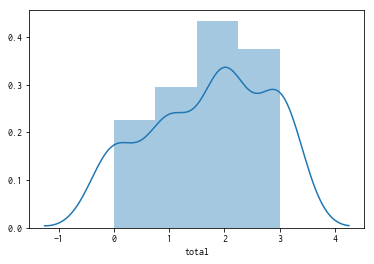

In [117]:
sns.distplot(check01['total'].astype(int))

In [125]:
sum(check01['total'] == 3)/check01.shape[0]

0.2814814814814815

In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mclf, X, y, cv=5)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-pac

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test['Color'], predict[:, 0]))
print('-'*50)
print(classification_report(y_test['Surface'], predict[:, 1]))
print('-'*50)
print(classification_report(y_test['Transparency'], predict[:, 2]))

             precision    recall  f1-score   support

      amber       0.67      0.33      0.44         6
      black       0.44      0.57      0.50         7
       blue       0.00      0.00      0.00         4
      brown       0.17      0.50      0.25         2
      clear       0.57      0.66      0.61        35
      green       0.50      0.64      0.56        11
     orange       0.25      0.33      0.29         3
        red       1.00      0.17      0.29         6
        tan       0.67      0.33      0.44         6
  turquoise       0.50      1.00      0.67         3
      white       0.70      0.67      0.69        49
     yellow       1.00      0.33      0.50         3

avg / total       0.61      0.58      0.57       135

--------------------------------------------------
              precision    recall  f1-score   support

      glossy       0.66      0.75      0.70        55
glossy shiny       0.00      0.00      0.00         3
       matte       0.40      0.12      0.

In [85]:
scores

array([0.08333333, 0.12037037, 0.22222222, 0.17757009, 0.18691589])